# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Problem-1

How many samples does the dataset have?

In [ ]:
# Enter your solution here
n_samples, n_features = X.shape

# Print the results
print("Number of samples:", n_samples)

Number of samples: 100


## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
print("Number of features:", n_features)

Number of features: 784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

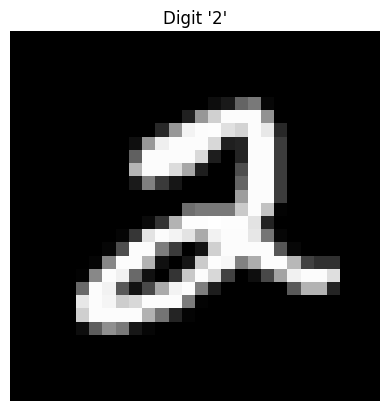

In [ ]:
# Enter your solution here

import matplotlib.pyplot as plt

# Reshape the first sample back to 28x28
sample_image = X[0].reshape(28, 28)

# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.title("Digit '2'")
plt.axis('off')
plt.show()

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Enter your solution here

# Center the dataset
X_mean = np.mean(X, axis=0)
X_prime = X - X_mean

n, d = X_prime.shape
value = (1 / (n * d)) * np.sqrt(np.sum(X_prime ** 2))
print(round(value, 2))

0.23


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Enter your solution here

# Center the dataset

# Compute the covariance matrix
n, d = X_prime.shape
C = (1 / n) * (X_prime.T @ X_prime)

# Compute the final expression
value = (1 / (d ** 2)) * np.sqrt(np.sum(C ** 2))
print(round(value, 2))

1.36


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Enter your solution here

# Center the dataset
# Covariance matrix

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# First and second principal components
w1 = eigenvectors[:, 0]
w2 = eigenvectors[:, 1]

# Compute the required value
w = w1 + w2
answer = abs(np.sum(w))
print(round(answer, 2))

1.05


## Problem-7

Visualize the first principal component as an image.

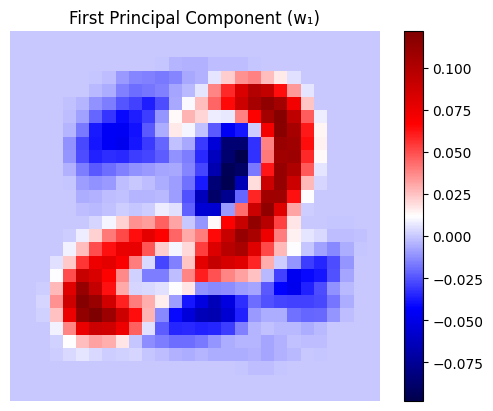

In [ ]:
# Enter your solution here

# Center the dataset
# Compute covariance matrix
# Eigendecomposition
# First principal component

# Reshape to 28x28 and visualize
w1_image = w1.reshape(28, 28)

plt.imshow(w1_image, cmap='seismic')  # seismic or RdBu shows positive/negative variations
plt.title("First Principal Component (w₁)")
plt.colorbar()
plt.axis('off')
plt.show()

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# Enter your solution here

# Center the data
X_mean = np.mean(X, axis=0)
X_prime = X - X_mean

# Covariance matrix
n, d = X_prime.shape
C = (1 / n) * (X_prime.T @ X_prime)

# Eigendecomposition
eigenvalues, _ = np.linalg.eigh(C)

# Sort eigenvalues in descending order
eigenvalues = np.sort(eigenvalues)[::-1]

# Compute cumulative explained variance
total_variance = np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(eigenvalues) / total_variance

# Find smallest k such that explained variance >= 0.95
k = np.argmax(explained_variance_ratio >= 0.95) + 1

print("Smallest value of k for 95% variance:", k)

Smallest value of k for 95% variance: 784


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



k values for 20%, 50%, 80%, 95% variance: [np.int64(2), np.int64(6), np.int64(22), np.int64(53)]


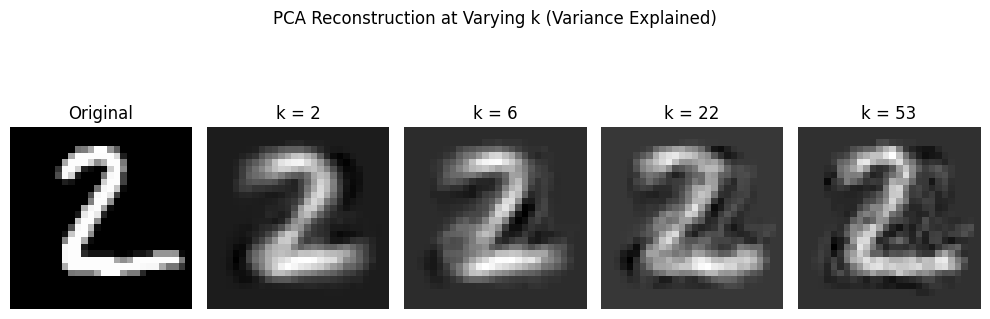

In [ ]:
# Enter your solution here

# Center the dataset
X_mean = np.mean(X, axis=0)
X_prime = X - X_mean

# Covariance matrix and eigendecomposition
n, d = X_prime.shape
C = (1 / n) * (X_prime.T @ X_prime)
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sort eigenvectors and eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute explained variance ratio
explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Define target variance thresholds
thresholds = [0.20, 0.50, 0.80, 0.95]

# Find the corresponding k values
k_values = [np.argmax(explained_variance_ratio >= t) + 1 for t in thresholds]
print("k values for 20%, 50%, 80%, 95% variance:", k_values)

# Select a test image of digit '2'
test_image = X_test[y_test == 2][0].reshape(1, -1)

# Center the test image
test_image_centered = test_image - X_mean

# Reconstruct the image using different k values
reconstructions = []
for k in k_values:
    W_k = eigenvectors[:, :k]                  # Top-k eigenvectors
    projection = test_image_centered @ W_k     # Project onto top-k PCs
    reconstruction = projection @ W_k.T        # Reconstruct from PCs
    reconstruction += X_mean                   # Add mean back
    reconstructions.append(reconstruction.reshape(28, 28))

# Plot original and reconstructions
plt.figure(figsize=(10, 4))
plt.subplot(1, 5, 1)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (k, recon) in enumerate(zip(k_values, reconstructions)):
    plt.subplot(1, 5, i + 2)
    plt.imshow(recon, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("PCA Reconstruction at Varying k (Variance Explained)")
plt.tight_layout()
plt.show()